In [207]:
# Import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [190]:
graph_filename = "ssd_mobilenet_v1_coco_11_06_2017/frozen_inference_graph.pb"

In [202]:
# Helper functions
def load_graph(frozen_graph_filename):
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read()) 
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")
    return graph

def load_image(image_filename):
    img = cv2.imread(image_filename)
    return  cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def draw_rect(image, bbox, thickness = 4):
    rows = image.shape[0]
    cols = image.shape[1]
    x = bbox[1] * cols
    y = bbox[0] * rows
    right = bbox[3] * cols
    bottom = bbox[2] * rows
    return cv2.rectangle(image, (int(x), int(y)), (int(right), int(bottom)), (255, 0, 0), thickness=thickness)

In [203]:
# Load frozen graph
graph = load_graph(graph_filename)    

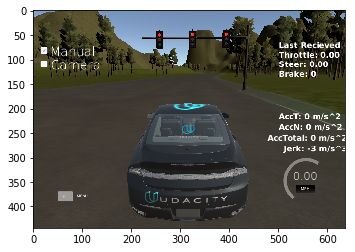

In [208]:
# Load test image
image = load_image('test_images/3.png') 
plt.imshow(image)
plt.show()

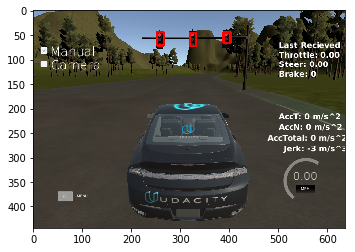

In [209]:
# Run inference
with tf.Session(graph=graph) as sess:
    tf_image_input = np.expand_dims(image, axis=0)
    detections, scores, boxes, classes = sess.run([
        sess.graph.get_tensor_by_name('num_detections:0'),
        sess.graph.get_tensor_by_name('detection_scores:0'),
        sess.graph.get_tensor_by_name('detection_boxes:0'),
        sess.graph.get_tensor_by_name('detection_classes:0')], 
        feed_dict={'image_tensor:0': tf_image_input})
    num_detections = int(np.squeeze(detections))
    for i in range(num_detections):
        classId = int(np.squeeze(classes)[i])
        if (classId != 10):
            continue
        score = np.squeeze(scores)[i]
        bbox = [float(v) for v in np.squeeze(boxes)[i]]
        if score > 0.3:
            #print ("Class: {}, Score: {}".format(classId, score))
            image_out = draw_rect(image, bbox)
            plt.imshow(image_out)
plt.show()